**Implementation From Scratch**

I did this assignment before the additional Python file was uploaded to OnQ, so I solved it just using Numpy and confirmed this is ok with the course instructor 

Devynn Garrow (20148909)

Due: October 6, 2023

In [57]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [58]:
#Load in data from scikit-learn
data = load_breast_cancer(return_X_y = True)
x = data[0]
y = data[1]

#Scale Data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x,y)

#Split data into training and testing sets (75% training, 25% testing)
training_data, testing_data, training_target_output, testing_target_output = train_test_split(x_scaled, y, test_size=0.25)

In [59]:
#Define Sigmoid Activation Function
def sigmoid(x):
    return 1/(1+np.exp(np.negative(x)))

In [60]:
#Step 2: Define neural network architecture
#Allow customization of input size, hidden size, and output size

#Randomly initialize all weights following a Gaussian distribution centred at 0 with a standard deviation of 1
def network(num_input_features, num_hidden_nodes, num_output_nodes):
    hidden_nodes = []
    output_nodes = []
    for i in range(0, num_hidden_nodes):
        weights = np.random.normal(0, 1, num_input_features).tolist()
        weights.append(0.5)
        hidden_nodes.append(weights)
    for j in range(0, num_output_nodes):
        weights = np.random.normal(0, 1, num_hidden_nodes).tolist()
        weights.append(0.5)
        output_nodes.append(weights)

    return hidden_nodes, output_nodes

In [61]:
#Step 3: Implement forward propagation

#input [x1, x2, x3, ...] *1 pattern
#hidden nodes [[w11, w21, w31, ..., w01], [w12, w22, w32, ..., w02], ...]
#output node [[w11, w21, w31, ..., w01], [w12, w22, w32, ..., w02], ...]
def forwardPropagation(input, hidden_nodes, output_nodes):
    output = []
    x = input
    hidden_node_input = []
    hidden_node_output = []
    output_node_input = []
    output_node_output = []
    for i in range(0, len(hidden_nodes)):
        w = hidden_nodes[i]
        hi_net = w[-1]
        hi_net_test = np.sum(np.multiply(x,w))
        for j in range(0, len(x)):
            hi_net = hi_net + x[j]*w[j]
        hidden_node_input.append(hi_net)
    hidden_node_output = sigmoid(hidden_node_input).tolist()
    hidden_node_output.append(1)
    for i in range(0, len(output_nodes)):
        w = output_nodes[i]
        yi_net = w[-1]
        for j in range(0, len(hidden_node_output)):
            yi_net = yi_net + hidden_node_output[j]*w[j]
        output_node_input.append(yi_net)
    output_node_output = sigmoid(output_node_input).tolist()   
    output.append(output_node_output)
    return output, output_node_input, hidden_node_output, hidden_node_input

In [62]:
#Step 4: Calculate errors and loss
def error_i(y_pred, y_test):
    return np.subtract(y_pred, y_test)

def mean_squared_error(error):
    return np.square(error)

def sum_square_error(mse):
    return(np.sum(mse))

def error(y_pred, y_test):
    sse = []
    for i in range(0, len(y_test)):
        mse = mean_squared_error(error_i(y_pred[i], y_test[i]))
        sse.append(sum_square_error(mse))
    loss = np.sum(sse)
    return sse, loss

In [63]:
#Step 5: Implement backpropagation
#Allow customization of learning rate and number of iterations

#Derivative of a sigmoid s = s*(1-s)
def sigmoid_derivative(x):
    return np.multiply(sigmoid(x), (np.subtract(1,sigmoid(x))))

#Backpropagation weight update calculationg
def backpropagation(c, output, y_pred, yi_net, hi_out, hi_net, output_nodes, input):

    #weight adjustment for hidden to output
    delta_w_output = []
    #each output node
    for j in range(0, len(yi_net)):
        error_j = error_i(y_pred, output[j]) 
        delta_w_i = []
        #each hidden node
        for h in range(0, len(hi_out)):
            delta_w_i.append((c*error_j*sigmoid_derivative(yi_net[j])*hi_out[h])[0])
        delta_w_output.append(delta_w_i)

    #weight adjustment for input to hidden
    delta_w_hidden = []
    #each hidden node
    for h in range(0, len(hi_net)):
        delta_w_h = []
        #each input node
        for i in range(0, len(input)):
            sumOutputNodes = 0
            #each output node
            for j in range(0, len(output)):
                error_j = error_i(y_pred, output[j]) 
                sumOutputNodes = (sumOutputNodes + error_j*sigmoid_derivative(yi_net[j])*output_nodes[j][h])[0]
            delta_w_h.append((c*sumOutputNodes*sigmoid_derivative(hi_net[h]).tolist()*input[i]))
        delta_w_hidden.append(delta_w_h)
            
    return delta_w_output, delta_w_hidden
            

In [64]:
#Step 6: Training loop with mini-batches
#Allow customization of batch size
def training(c, batch_size, training_data, target_output, hidden_nodes, output_nodes): 
    count = 0
    delta_w_output_batch = []
    delta_w_hidden_batch = []
    trained_hidden_nodes = hidden_nodes
    trained_output_nodes = output_nodes
    for i in range(0, len(training_data)):
        input = (training_data[i].tolist())
        input.append(1)
        if(count < batch_size and i != len(training_data)-1):
            output, output_node_input, hidden_node_output, hidden_node_input = forwardPropagation(input, trained_hidden_nodes, trained_output_nodes)
            delta_w_output, delta_w_hidden = backpropagation(c, output, target_output[i], output_node_input, hidden_node_output, hidden_node_input, trained_output_nodes, input)
            delta_w_output_batch.append(delta_w_output)
            delta_w_hidden_batch.append(delta_w_hidden)
            count = count +1
        else:
            output, output_node_input, hidden_node_output, hidden_node_input = forwardPropagation(input, trained_hidden_nodes, trained_output_nodes)
            delta_w_output, delta_w_hidden = backpropagation(c, output, target_output[i], output_node_input, hidden_node_output, hidden_node_input, trained_output_nodes, input)
            delta_w_output_batch.append(delta_w_output)
            delta_w_hidden_batch.append(delta_w_hidden)

            #update weights
            for j in range(0, len(trained_output_nodes)):
                summed_weights = delta_w_output_batch[0][j]
                for k in range(1, len(delta_w_output_batch)): 
                    summed_weights = np.add(summed_weights, delta_w_output_batch[k][j])
                averaged_weights = np.divide(summed_weights, batch_size)
                trained_output_nodes[j] = np.add(trained_output_nodes[j], averaged_weights.tolist()).tolist()
            for h in range(0, len(trained_hidden_nodes)):
                summed_weights = delta_w_hidden_batch[0][h]
                for k in range(1, len(delta_w_hidden_batch)): 
                    summed_weights = np.add(summed_weights, delta_w_hidden_batch[k][h])
                averaged_weights = np.divide(summed_weights, batch_size)
                trained_hidden_nodes[h] = np.add(trained_hidden_nodes[h], averaged_weights.tolist()).tolist()
            count = 0
            delta_w_output_batch.clear()
            delta_w_hidden_batch.clear()
    return trained_hidden_nodes, trained_output_nodes
        
        

In [65]:
#Step 7: Implement prediction function
def predict(input, trained_hidden_nodes, trained_output_nodes):
    y_pred = []
    for x in input:
        data = x.tolist()
        data.append(1)
        output = forwardPropagation(data, trained_hidden_nodes, trained_output_nodes)
        y_pred.append(output[0][0][0])
    return y_pred

In [66]:
#Step 8: Evaluation
def evaluate(y_pred, y_test):
    #Implement confusion matrix, recall, and precision calculations
    #Return these evaluation metrics
    y_test = np.array(y_test)
    tp = len(y_test[np.where(np.logical_and(y_test == 0, y_pred == 0))])
    tn = len(y_test[np.where(np.logical_and(y_test == 1, y_pred == 1))])
    fp = len(y_test[np.where(np.logical_and(y_test == 0, y_pred == 1))])
    fn = len(y_test[np.where(np.logical_and(y_test == 1, y_pred == 0))])

    confusion_matrix = [[tp, fp], [fn, tn]]
    print("Confusion Matrix:" + str(confusion_matrix))
    precision = tn/(tn+fn)
    print("Precision: "+ str(round(precision, 3)))
    recall = tp/(tp+fn)
    print("Recall: "+ str(round(recall, 3)))

    return confusion_matrix, recall, precision

In [69]:
#Step 9: Customization
#Allow customization of hidden size, learning rate, number of iterations, and batch size
num_epochs = 1000
hidden_size = 3
learning_rate = 0.01
batch_size = 32
num_input_features = 2
num_output_nodes = 1

training_accuracy = []
testing_accuracy = []

hidden_nodes, output_nodes = network(len(training_data[0]), hidden_size, num_output_nodes)
for i in range(0,num_epochs):
    hidden_nodes, output_nodes = training(learning_rate, batch_size, training_data, training_target_output, hidden_nodes, output_nodes) 
    y_train_pred = predict(training_data, hidden_nodes, output_nodes)
    y_test_pred = predict(testing_data, hidden_nodes, output_nodes)
    train_error = error(training_target_output, y_train_pred)[1]/len(training_data)
    test_error = error(testing_target_output, y_test_pred)[1]/len(testing_data)
    training_accuracy.append(1-train_error)
    testing_accuracy.append(1-test_error)
    if(i%50 == 0):
        print('epoch %d, train error %.4f, test error %.4f' % (i + 1, train_error, test_error))


epoch 1, train error 0.2199, test error 0.2617
epoch 51, train error 0.1659, test error 0.1872
epoch 101, train error 0.1404, test error 0.1505
epoch 151, train error 0.1247, test error 0.1304
epoch 201, train error 0.1124, test error 0.1159
epoch 251, train error 0.1021, test error 0.1045
epoch 301, train error 0.0935, test error 0.0953
epoch 351, train error 0.0864, test error 0.0878
epoch 401, train error 0.0803, test error 0.0816
epoch 451, train error 0.0752, test error 0.0765
epoch 501, train error 0.0708, test error 0.0722
epoch 551, train error 0.0669, test error 0.0686
epoch 601, train error 0.0636, test error 0.0656
epoch 651, train error 0.0606, test error 0.0630
epoch 701, train error 0.0579, test error 0.0607
epoch 751, train error 0.0555, test error 0.0588
epoch 801, train error 0.0533, test error 0.0570
epoch 851, train error 0.0513, test error 0.0555
epoch 901, train error 0.0495, test error 0.0541
epoch 951, train error 0.0479, test error 0.0529


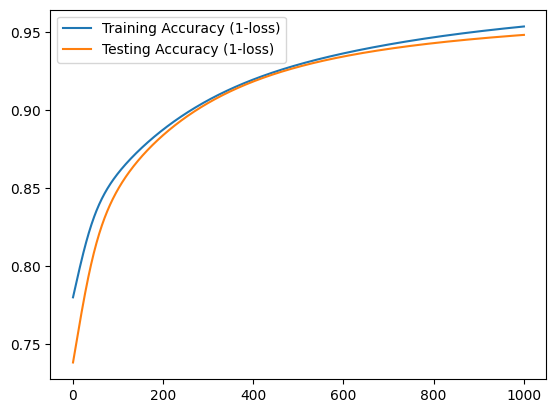

Test Targeted Output:
[0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1
 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1]
Test Model Output:
[0.24767228827102883, 0.17802906110835476, 0.9413919546456355, 0.8263137257619749, 0.8986636926851379, 0.760278963691844, 0.15982652473444223, 0.8209637999483727, 0.12857372207263704, 0.9432107541947515, 0.1303022793129133, 0.9428493252198289, 0.9046994420958345, 0.13557545200469528, 0.9241843435891351, 0.4174148072683291, 0.1489222577272323, 0.12987601050723932, 0.9350042872878045, 0.7228996862994856, 0.6741067432209608, 0.1549894376633128, 0.1348463593295976, 0.12875637668311377, 0.4565111452790223, 0.9396895644840616, 0.9287160502235868, 0.9379783993285887, 0.9365425398441174, 0.5971299092640023, 0.12856279442927707, 0.9433354098453459, 0.15545685461249997,

In [70]:
x_plot = np.linspace(1, num_epochs, num_epochs)
plt.plot(x_plot, training_accuracy, label = "Training Accuracy (1-loss)")
plt.plot(x_plot, testing_accuracy, label = "Testing Accuracy (1-loss)")
plt.legend()

plt.show()

print("Test Targeted Output:")
print(testing_target_output)
print("Test Model Output:")
print(y_test_pred)

In [71]:
confusion_matrix, recall, precision = evaluate(testing_target_output, np.round(y_test_pred))

Confusion Matrix:[[55, 1], [7, 80]]
Precision: 0.92
Recall: 0.887
